In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, t, chi2
from scipy.stats import iqr, median_abs_deviation

In [26]:
# Significane level
ALPHA = 0.05

---

Reading and preprocessing data

In [27]:
DataWhr2024 = pd.read_csv("DataWhr2024.csv")
UnM49 = pd.read_csv("UnM49.csv", sep=';')

In [28]:
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Hong"), "Country name"] = "Hong Kong"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Somaliland"), "Country name"] = "Somaliland"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Taiwan"), "Country name"] = "Taiwan"

In [29]:
UnM49 = UnM49[['Country or Area', 'Sub-region Name', 'Region Name']]
UnM49 = UnM49.rename({'Country or Area':'Country name', 'Sub-region Name':'Subregion', 'Region Name':'Continent'}, axis=1)

In [30]:
UnM49.loc[97, "Country name"] = "Bolivia"
UnM49.loc[33, "Country name"] = "Congo (Brazzaville)"
UnM49.loc[34, "Country name"] = "Congo (Kinshasa)"
UnM49.loc[124, "Country name"] = "Hong Kong"
UnM49.loc[125, "Country name"] = "Macao"
UnM49.loc[126, "Country name"] = "North Korea"
UnM49.loc[145, "Country name"] = "Iran"
UnM49.loc[46, "Country name"] = "Ivory Coast"
UnM49.loc[133, "Country name"] = "Laos"
UnM49.loc[129, "Country name"] = "South Korea"
UnM49.loc[173, "Country name"] = "Moldova"
UnM49.loc[217, "Country name"] = "Netherlands"
UnM49.loc[175, "Country name"] = "Russia"
UnM49.loc[164, "Country name"] = "Syria"
UnM49.loc[26, "Country name"] = "Tanzania"
UnM49.loc[116, "Country name"] = "United States"
UnM49.loc[193, "Country name"] = "United Kingdom"
UnM49.loc[111, "Country name"] = "Venezuela"
UnM49.loc[140, "Country name"] = "Vietnam"

In [31]:
_ = pd.DataFrame(
    {
        "Country name": ["Kosovo", "Somaliland", "Taiwan"],
        "Subregion": ["Southern Europe", "Sub-Saharan Africa", "Eastern Asia"],
        "Continent": ["Europe", "Africa", "Asia"],
    }
)

UnM49 = pd.concat([UnM49, _], axis=0)
UnM49 = UnM49.reset_index(drop=True)

Merging the datasets

In [32]:
# Data
Dat = pd.merge(DataWhr2024, UnM49)

# Data of 2023
Dat2023 = Dat[Dat['year'] == 2023]
Dat2023 = Dat2023.reset_index(drop=True)

In [33]:
# Extract the 'Life Ladder' data
Data1 = Dat2023['Life Ladder']

**Question 1**

In [34]:
# Estimators for μ
mean_estimator = np.mean(Data1)
median_estimator = np.median(Data1)

# Estimators for σ
# Sample standard deviation (1 degree of freedom)
std_dev_estimator = np.std(Data1, ddof=1)

# Median Absolute Deviation (MAD), scaled
mad = np.median(np.abs(Data1 - median_estimator))
mad_estimator = mad * 1.4826

# Interquartile Range (IQR), scaled
q1 = np.percentile(Data1, 25)
q3 = np.percentile(Data1, 75)
iqr = q3 - q1
iqr_estimator = iqr * 0.7413

# Create a results table
results = pd.DataFrame({
    'Mean (X̄n)': [round(mean_estimator, 4)],
    'Median (X̃n)': [round(median_estimator, 4)],
    'Std. Dev (σ̂1)': [round(std_dev_estimator, 4)],
    'MAD (σ̂2)': [round(mad_estimator, 4)],
    'IQR (σ̂3)': [round(iqr_estimator, 4)]
})

# Print the results
print(results)


   Mean (X̄n)  Median (X̃n)  Std. Dev (σ̂1)  MAD (σ̂2)  IQR (σ̂3)
0      5.6208         5.863          1.1395     1.1764     1.3399


**Question 2**

In [35]:
# MLE for μ (mean)
mle_mu = np.mean(Data1)

# MLE for σ (standard deviation)
mle_sigma = np.sqrt(np.mean((Data1 - mle_mu) ** 2))

# Report the results rounded to 4 decimal places
results = pd.DataFrame({
    'MLE for μ': [round(mle_mu, 4)],
    'MLE for σ': [round(mle_sigma, 4)]
})

# Print the results
print(results)

   MLE for μ  MLE for σ
0     5.6208     1.1353


**Question 3**

In [36]:
n = len(Data1)  # Sample size
Z = 1.96  # Critical value for 95% confidence level

# Mean and median estimators
mean_estimator = np.mean(Data1)
median_estimator = np.median(Data1)

# Standard deviation estimators
std_dev_estimator = np.std(Data1, ddof=1)  # σ̂1
mad = np.median(np.abs(Data1 - median_estimator))
mad_estimator = mad * 1.4826  # σ̂2
q1 = np.percentile(Data1, 25)
q3 = np.percentile(Data1, 75)
iqr = q3 - q1
iqr_estimator = iqr * 0.7413  # σ̂3

# CI for the mean
def CI_mu_mean(hat_mu, hat_sigma, n, alpha=0.05):
    z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed Z-critical value
    margin_error = z_critical * (hat_sigma / np.sqrt(n))
    return hat_mu - margin_error, hat_mu + margin_error

# CI for the median
def CI_mu_median(hat_mu, hat_sigma, n, alpha=0.05):
    z_critical = norm.ppf(1 - alpha / 2)
    density_at_median = 1 / (np.sqrt(2 * np.pi) * hat_sigma)  # f( ̃μ)
    std_error = 1 / (4 * n * density_at_median**2)**0.5  # Standard error for the median
    margin_error = z_critical * std_error
    return hat_mu - margin_error, hat_mu + margin_error

ci_mean_sigma1 = CI_mu_mean(mean_estimator, std_dev_estimator, n)
ci_mean_sigma2 = CI_mu_mean(mean_estimator, mad_estimator, n)
ci_mean_sigma3 = CI_mu_mean(mean_estimator, iqr_estimator, n)
ci_median_sigma1 = CI_mu_median(median_estimator, std_dev_estimator, n)
ci_median_sigma2 = CI_mu_median(median_estimator, mad_estimator, n)
ci_median_sigma3 = CI_mu_median(median_estimator, iqr_estimator, n)

# Prepare the results in a table, rounded to 4 decimal places
result_table = pd.DataFrame({
    'CI Type': ['Mean (σ̂1)', 'Mean (σ̂2)', 'Mean (σ̂3)', 
                'Median (σ̂1)', 'Median (σ̂2)', 'Median (σ̂3)'],
    'Lower Bound': [round(ci_mean_sigma1[0], 4), round(ci_mean_sigma2[0], 4), round(ci_mean_sigma3[0], 4),
                    round(ci_median_sigma1[0], 4), round(ci_median_sigma2[0], 4), round(ci_median_sigma3[0], 4)],
    'Upper Bound': [round(ci_mean_sigma1[1], 4), round(ci_mean_sigma2[1], 4), round(ci_mean_sigma3[1], 4),
                    round(ci_median_sigma1[1], 4), round(ci_median_sigma2[1], 4), round(ci_median_sigma3[1], 4)]
})

result_table

CI Type  Lower Bound  Upper Bound
0    Mean (σ̂1)       5.4307       5.8110
1    Mean (σ̂2)       5.4246       5.8171
2    Mean (σ̂3)       5.3973       5.8444
3  Median (σ̂1)       5.6247       6.1013
4  Median (σ̂2)       5.6170       6.1090
5  Median (σ̂3)       5.5828       6.1432

**Question 4**

In [37]:
# Degrees of freedom
df = n - 1

# Critical values for chi-squared distribution
alpha = 0.05
chi2_lower = chi2.ppf(alpha / 2, df)
chi2_upper = chi2.ppf(1 - alpha / 2, df)

# Confidence interval for σ²
lower_bound_variance = (df * (std_dev_estimator ** 2)) / chi2_upper
upper_bound_variance = (df * (std_dev_estimator ** 2)) / chi2_lower

# Confidence interval for σ (square root of variance bounds)
lower_bound_sigma = np.sqrt(lower_bound_variance)
upper_bound_sigma = np.sqrt(upper_bound_variance)

# Print results rounded to 4 decimals
ci_sigma = (round(lower_bound_sigma, 4), round(upper_bound_sigma, 4))
print(f"95% Confidence Interval for σ: {ci_sigma}")

95% Confidence Interval for σ: (np.float64(1.0191), np.float64(1.2924))


**Question 5**

In [38]:
n = len(Data1)  # Sample size
Z = 1.96  # Critical value for 95% confidence level

# Mean and median estimators
mean_estimator = np.mean(Data1)
median_estimator = np.median(Data1)

# Standard deviation estimators
std_dev_estimator = np.std(Data1, ddof=1)  # σ̂1
mad = np.median(np.abs(Data1 - median_estimator))
mad_estimator = mad * 1.4826  # σ̂2
q1 = np.percentile(Data1, 25)
q3 = np.percentile(Data1, 75)
iqr = q3 - q1
iqr_estimator = iqr * 0.7413  # σ̂3


def PI_mu_mean(hat_mu, hat_sigma, n, alpha=0.05):
    z_critical = norm.ppf(1 - alpha / 2)
    margin_error = z_critical * np.sqrt(hat_sigma**2 + (hat_sigma**2 / n))
    return hat_mu - margin_error, hat_mu + margin_error

def PI_mu_median(hat_mu, hat_sigma, n, alpha=0.05):
    z_critical = norm.ppf(1 - alpha / 2)
    density_at_median = 1 / (np.sqrt(2 * np.pi) * hat_sigma)  # f(μ̃)
    std_error = np.sqrt(1 / (4 * n * density_at_median**2) + hat_sigma**2)
    margin_error = z_critical * std_error
    return hat_mu - margin_error, hat_mu + margin_error

def PI_iqr_nonparametric(q1, q3, iqr, alpha=0.05):
    # Critical Z-value
    z_critical = norm.ppf(1 - alpha / 2)
    # Inverse CDF of the normal distribution at 0.75
    phi_inv_3_4 = norm.ppf(0.75)
    # Delta calculation
    delta = 0.5 * ((z_critical / phi_inv_3_4) - 1)
    # Prediction interval
    lower_bound = q1 - delta * iqr
    upper_bound = q3 + delta * iqr
    return lower_bound, upper_bound

pi_mean_sigma1 = PI_mu_mean(mean_estimator, std_dev_estimator, n)
pi_mean_sigma2 = PI_mu_mean(mean_estimator, mad_estimator, n)
pi_mean_sigma3 = PI_mu_mean(mean_estimator, iqr_estimator, n)
pi_median_sigma1 = PI_mu_median(median_estimator, std_dev_estimator, n)
pi_median_sigma2 = PI_mu_median(median_estimator, mad_estimator, n)
pi_median_sigma3 = PI_mu_median(median_estimator, iqr_estimator, n)

pi_iqr = PI_iqr_nonparametric(q1, q3, iqr)

# Prepare the results in a table, rounded to 4 decimal places
result_table = pd.DataFrame({
    'CI Type': ['Mean (σ̂1)', 'Mean (σ̂2)', 'Mean (σ̂3)', 
                'Median (σ̂1)', 'Median (σ̂2)', 'Median (σ̂3)',
                'IQR'],
    'Lower Bound': [round(pi_mean_sigma1[0], 4), round(pi_mean_sigma2[0], 4), round(pi_mean_sigma3[0], 4),
                    round(pi_median_sigma1[0], 4), round(pi_median_sigma2[0], 4), round(pi_median_sigma3[0], 4),
                    round(pi_iqr[0], 4)],
    'Upper Bound': [round(pi_mean_sigma1[1], 4), round(pi_mean_sigma2[1], 4), round(pi_mean_sigma3[1], 4),
                    round(pi_median_sigma1[1], 4), round(pi_median_sigma2[1], 4), round(pi_median_sigma3[1], 4),
                    round(pi_iqr[1], 4)]
})

result_table

CI Type  Lower Bound  Upper Bound
0    Mean (σ̂1)       3.3794       7.8623
1    Mean (σ̂2)       3.3067       7.9350
2    Mean (σ̂3)       2.9852       8.2565
3  Median (σ̂1)       3.6170       8.1090
4  Median (σ̂2)       3.5441       8.1819
5  Median (σ̂3)       3.2219       8.5041
6           IQR       2.9573       8.2097

**Question 6**

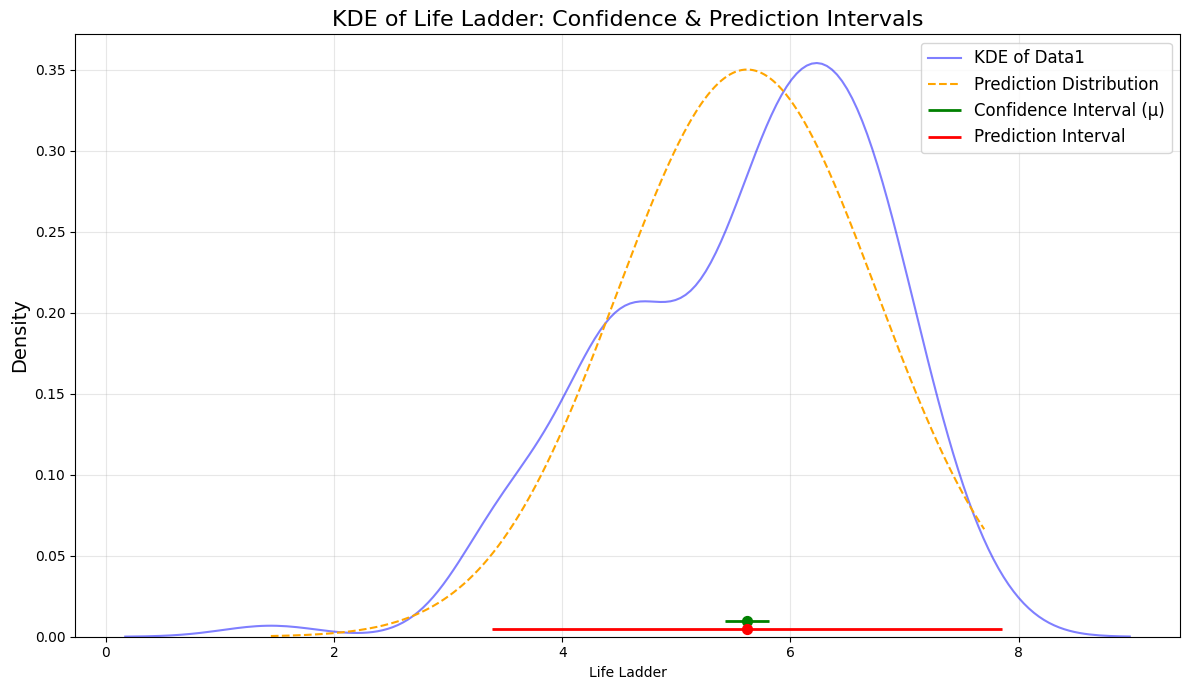

In [39]:
# Calculate basic statistics
mean_xn = np.mean(Data1)
std1 = np.std(Data1, ddof=1)  # Sample SD
z_critical = norm.ppf(0.975)  # 95% confidence level

# Confidence interval for the mean (μ)
ci_lower = mean_xn - z_critical * (std1 / np.sqrt(len(Data1)))
ci_upper = mean_xn + z_critical * (std1 / np.sqrt(len(Data1)))

# Prediction interval for Life Ladder
pi_lower = mean_xn - z_critical * std1
pi_upper = mean_xn + z_critical * std1

# Prepare the KDE and prediction distribution
x_vals = np.linspace(min(Data1), max(Data1), 1000)
pdf = norm.pdf(x_vals, loc=mean_xn, scale=std1)  # Prediction distribution (normal)

# Plot the KDE
plt.figure(figsize=(12, 7))
sns.kdeplot(Data1, color="blue", label="KDE of Data1", alpha=0.5)

# Overlay prediction distribution
plt.plot(x_vals, pdf, color="orange", linestyle="--", label="Prediction Distribution")

# Plot intervals with shaded regions
plt.hlines(y=0.01, xmin=ci_lower, xmax=ci_upper, color="green", linewidth=2, label="Confidence Interval (μ)")
plt.hlines(y=0.005, xmin=pi_lower, xmax=pi_upper, color="red", linewidth=2, label="Prediction Interval")
plt.fill_betweenx([0.01], ci_lower, ci_upper, color="green", alpha=0.2)
plt.fill_betweenx([0.005], pi_lower, pi_upper, color="red", alpha=0.2)

# Mark mean as a prominent dot for both intervals
plt.scatter(mean_xn, 0.01, color="green", zorder=5, s=50)
plt.scatter(mean_xn, 0.005, color="red", zorder=5, s=50)


# Add labels, legend, and grid
plt.title("KDE of Life Ladder: Confidence & Prediction Intervals", fontsize=16)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

**Question 7**

In [40]:
ALPHA = 0.05

N = len(Data1)
MU = Data1.mean()
SIGMA = Data1.std()

np.random.seed(111)
YSample = norm.rvs(MU, SIGMA, size=N)

In [41]:
def RelativeLogLikelihood(mu, sigma, data):
    n = len(data)
    sigma_hat = np.std(data)

    return n * (np.log(sigma_hat / sigma) + 0.5 * (1 - (np.mean(data**2) - 2 * mu * np.mean(data) + mu**2) / sigma**2))

def RelativeLikelihood(mu, sigma, data):
    return np.exp(RelativeLogLikelihood(mu, sigma, data))

In [42]:
def RelativeLogLikelihood(mu, sigma, data):
    n = len(data)
    sigma_hat = np.std(data)

    # Vectorized computation of the log-likelihood
    mean_data = np.mean(data)
    mean_squared_data = np.mean(data**2)
    
    return n * (np.log(sigma_hat / sigma) + 0.5 * (1 - (mean_squared_data - 2 * mu * mean_data + mu**2) / sigma**2))

# Define RelativeLikelihood based on the log-likelihood
def RelativeLikelihood(mu, sigma, data):
    # Vectorized calculation
    return np.exp(RelativeLogLikelihood(mu, sigma, data))


In [43]:
# Calculate the MLE of mu and sigma
Mu_MLE = np.mean(YSample)
Sigma_MLE = np.std(YSample)

In [44]:
# Find confidence intervals for mu and sigma
S = np.std(YSample, ddof=1)

LowMu, UppMu = t.ppf(ALPHA/2, N-1, Mu_MLE, S/np.sqrt(N)), t.ppf(1 - ALPHA/2, N-1, Mu_MLE, S/np.sqrt(N))
LowSigma, UppSigma =  S * np.sqrt(N-1) / np.sqrt(chi2.ppf(1-ALPHA/2, N-1)), S * np.sqrt(N-1) / np.sqrt(chi2.ppf(ALPHA/2, N-1))

# Find prediction interval for Y
LowY, UppY = t.ppf(ALPHA/2, N-1, Mu_MLE, np.sqrt(S**2/N + S**2)), t.ppf(1 - ALPHA/2, N-1, Mu_MLE, np.sqrt(S**2/N + S**2))

In [45]:
Probabilities = np.array([0.1, 0.5, 0.75, 0.89, 0.95])
Probabilities = Probabilities[::-1] # We need to write the probabilities in a dicreasing order

Levels = np.exp(-0.5 * chi2.ppf(Probabilities, 2))

In [46]:
mu_vect = np.linspace(5.3, 6, 100)  # Extending the range to cover 5.62
sigma_vect = np.linspace(0.9, 1.3, 100)  # Adjusting to cover 1.139

mu_grid, sigma_grid = np.meshgrid(mu_vect, sigma_vect)

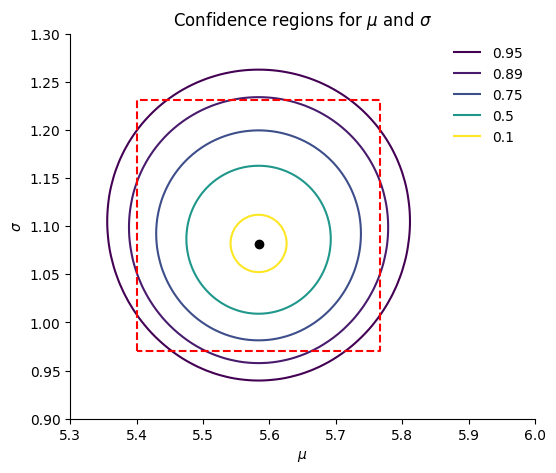

In [47]:
fig, ax = plt.subplots(figsize=(6, 5))

cnt = ax.contour(mu_grid, sigma_grid, RelativeLikelihood(mu_grid, sigma_grid, YSample), Levels)
ax.scatter(x=Mu_MLE, y=Sigma_MLE, color='k')

ax.plot([LowMu, LowMu, UppMu, UppMu, LowMu], [LowSigma, UppSigma, UppSigma, LowSigma, LowSigma], color='r', ls='--')

ax.set_title(r"Confidence regions for $\mu$ and $\sigma$")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\sigma$")

_, labels = cnt.legend_elements()
ax.legend(_, Probabilities, loc="upper right", frameon=False)

ax.spines[['right', 'top']].set_visible(False)



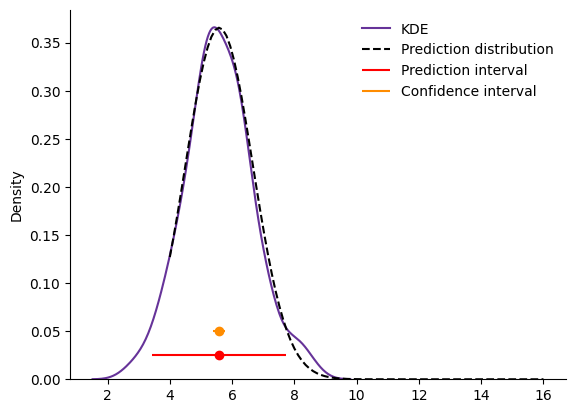

In [48]:
y_vect = np.linspace(4, 16, 100)

ax = sns.kdeplot(YSample, color="rebeccapurple", label="KDE")
ax.plot(y_vect, t.pdf(y_vect, N-1, Mu_MLE, np.sqrt(S**2/N + S**2)), color="k", ls="--",  label="Prediction distribution")

ax.hlines(0.025, LowY, UppY, color='red', label="Prediction interval")
ax.hlines(0.05, LowMu, UppMu, color='darkorange', label="Confidence interval")
ax.scatter(Mu_MLE, 0.025, color='red')
ax.scatter(Mu_MLE, 0.05, color='darkorange')

ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)